In [1]:
# import the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## ARMA Models
#### Introduction to stationarity

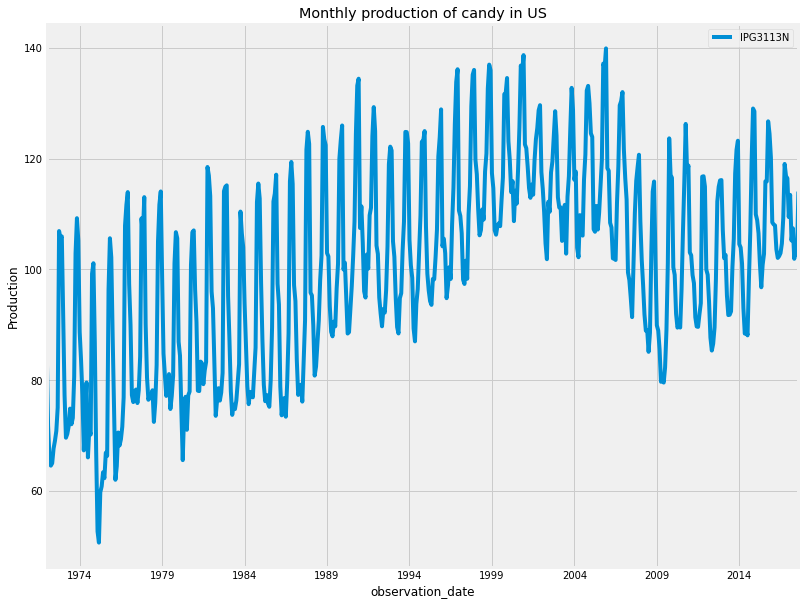

In [3]:
# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='observation_date',
            parse_dates=True)
# change the plot style into fivethirtyeight 
plt.style.use('fivethirtyeight')

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1, figsize=(12,10))
plt.title('Monthly production of candy in US')
plt.xlabel('observation_date')
plt.ylabel('Production')
plt.show()

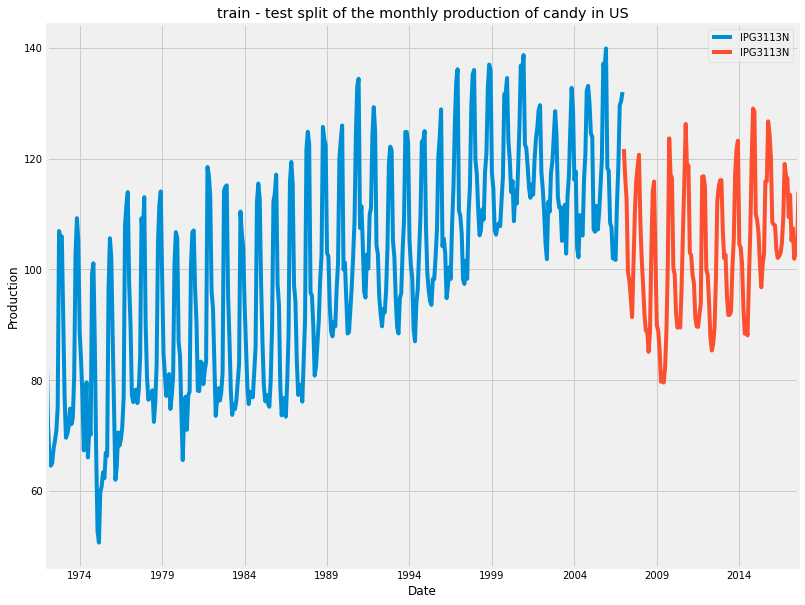

In [4]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax, figsize=(12,10))
candy_test.plot(ax=ax)
plt.title('train - test split of the monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

## Making a time series stationary

In [5]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(candy)
print(results)

(-1.8870498112252763, 0.3381775973004313, 14, 533, {'1%': -3.442678467240966, '5%': -2.8669778698997543, '10%': -2.5696661916864083}, 3012.789090974259)


In [6]:
# Calculate the first difference and drop the nans
candy_diff = candy.diff()
candy_diff = candy_diff.dropna()

# Run test and print
result_diff = adfuller(candy_diff)
print(result_diff)

(-6.119511504715748, 8.92558420357052e-08, 13, 533, {'1%': -3.442678467240966, '5%': -2.8669778698997543, '10%': -2.5696661916864083}, 3009.6697664167204)


## Introduction to AR, MA adn ARMA models

In [17]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar_coefs = [1, -0.5] 
ma_coefs = [1, 0.2]
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

In [18]:
from statsmodels.tsa.arima.model import ARIMA
# Instantiate model object
model = ARIMA(y, order=(1,0,1))
# Fit model
results = model.fit()

# Fitting the Future
#### Fitting time series models

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate model object
model = ARIMA(y, order=(1,0,1))

# Fit model
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -66.577
Date:                Mon, 03 Jul 2023   AIC                            141.154
Time:                        15:53:17   BIC                            151.574
Sample:                             0   HQIC                           145.371
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1280      0.118     -1.084      0.278      -0.359       0.103
ar.L1          0.5092      0.145      3.518      0.000       0.225       0.793
ma.L1          0.1906      0.165      1.152      0.2

# Forecasting

<Axes: xlabel='date'>

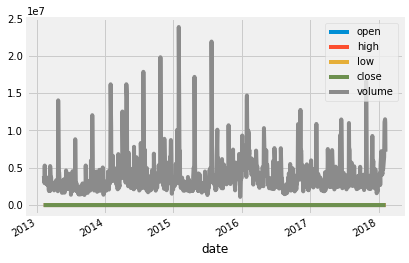

In [22]:
amazon = pd.read_csv('amazon_close.csv',
                     index_col='date',
                     parse_dates=True)
amazon.plot()

In [25]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Convert 'amazon' to a 1-dimensional array or series if needed
amazon_1d = np.squeeze(amazon.values.flatten())

# Run the Augmented Dickey-Fuller test
result = adfuller(amazon_1d)
print(result)

(-8.945858186454997, 8.992924200774693e-15, 34, 6260, {'1%': -3.4313950452870032, '5%': -2.8620018174727764, '10%': -2.56701582247956}, 188273.38750559703)


In [28]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'amazon' is a DataFrame with multiple time series columns
# Select a single column as the univariate endogenous variable
amazon_univariate = amazon['close']  

# Instantiate the model
model = ARIMA(amazon_univariate, order=(1, 1, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4739.694
Date:                Mon, 03 Jul 2023   AIC                           9485.389
Time:                        16:16:30   BIC                           9500.801
Sample:                             0   HQIC                          9491.181
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0006     40.862  -1.53e-05      1.000     -80.088      80.087
ma.L1       8.162e-05     40.868      2e-06      1.000     -80.100      80.100
sigma2       109.6639      1.264     86.780      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [29]:
# Generate predictions
one_step_forecast = results.get_prediction(end=20)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

date
2013-02-08      0.000000
2013-02-11    261.949984
2013-02-12    257.212568
2013-02-13    258.699193
2013-02-14    269.464165
2013-02-15    269.240125
2013-02-19    265.092248
2013-02-20    269.747475
2013-02-21    266.411810
2013-02-22    265.940254
2013-02-25    265.420282
2013-02-26    259.873007
2013-02-27    259.360276
2013-02-28    263.247892
2013-03-01    264.269448
2013-03-04    265.739204
2013-03-05    273.106007
2013-03-06    275.588657
2013-03-07    273.790975
2013-03-08    273.879951
2013-03-11    274.189832
Name: predicted_mean, dtype: float64


In [30]:
mean_forecast = mean_forecast[1:]

In [31]:
mean_forecast

date
2013-02-11    261.949984
2013-02-12    257.212568
2013-02-13    258.699193
2013-02-14    269.464165
2013-02-15    269.240125
2013-02-19    265.092248
2013-02-20    269.747475
2013-02-21    266.411810
2013-02-22    265.940254
2013-02-25    265.420282
2013-02-26    259.873007
2013-02-27    259.360276
2013-02-28    263.247892
2013-03-01    264.269448
2013-03-04    265.739204
2013-03-05    273.106007
2013-03-06    275.588657
2013-03-07    273.790975
2013-03-08    273.879951
2013-03-11    274.189832
Name: predicted_mean, dtype: float64

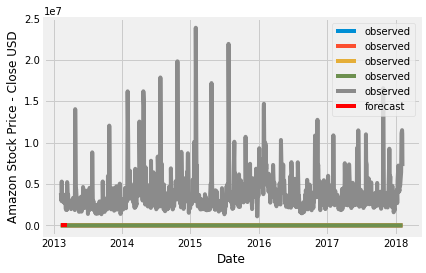

In [32]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index,mean_forecast,color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [33]:
# Generate predictions
dynamic_forecast = results.get_prediction(end= 20, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2013-02-08    0.0
2013-02-11    0.0
2013-02-12    0.0
2013-02-13    0.0
2013-02-14    0.0
2013-02-15    0.0
2013-02-19    0.0
2013-02-20    0.0
2013-02-21    0.0
2013-02-22    0.0
2013-02-25    0.0
2013-02-26    0.0
2013-02-27    0.0
2013-02-28    0.0
2013-03-01    0.0
2013-03-04    0.0
2013-03-05    0.0
2013-03-06    0.0
2013-03-07    0.0
2013-03-08    0.0
2013-03-11    0.0
Name: predicted_mean, dtype: float64


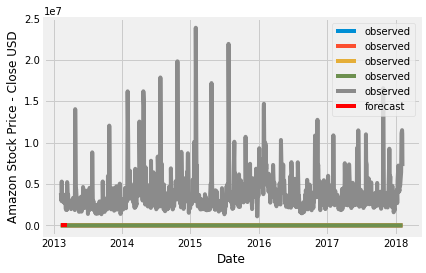

In [34]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

# ARIMA models for non-stationary time series

Text(0, 0.5, 'Stock price')

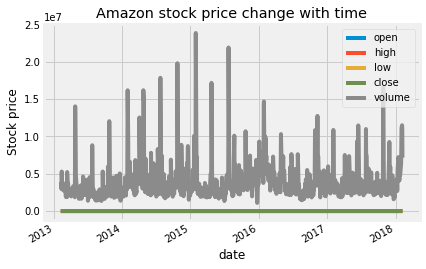

In [35]:
amazon = pd.read_csv('amazon_close.csv',
                     index_col='date',
                     parse_dates=True)
amazon.plot()
plt.title('Amazon stock price change with time')
plt.ylabel('Stock price')

In [38]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Convert 'amazon' to a 1-dimensional array or series if needed
amazon_1d = np.squeeze(amazon.values.flatten())

# Run the Augmented Dickey-Fuller test
result = adfuller(amazon_1d)

# Print test statistic
print('The test statistic:', result[0])

# Print p-value
print("The p-value:", result[1])

The test statistic: -8.945858186454997
The p-value: 8.992924200774693e-15


### The Augmented Dickey-Fuller test (ADF) is used to determine if a time series is stationary or not. 

#### the test statistic is -8.945858186454997, and the p-value is 8.992924200774693e-15 (a very small value close to zero).
#####  1. Test Statistic: The test statistic value of -8.945858186454997 is a numerical measure calculated by the ADF test. It represents how much the data deviates from being a non-stationary series. In general, the more negative the test statistic, the stronger the evidence against the null hypothesis of non-stationarity. In this case, the test statistic being significantly negative indicates strong evidence against non-stationarity.

###### 2. P-value: The p-value of 8.992924200774693e-15 is a probability associated with the test statistic. It indicates the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis is true (i.e., the data is non-stationary). A small p-value suggests strong evidence against the null hypothesis. In this case, the p-value is extremely small, close to zero, which indicates strong evidence against non-stationarity.

- The small p-value suggests that we reject the null hypothesis of non-stationarity. Therefore, the data appears to be   stationary or at least transformed into a stationary series. 
- Stationary time series have stable statistical properties over time, which makes them more amenable to analysis and         forecasting.

In [42]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Take the first difference of 'amazon' time series
amazon_diff = amazon.diff().values.flatten()
amazon_diff = amazon_diff[~np.isnan(amazon_diff)]

# Run the Augmented Dickey-Fuller test on the differenced series
result = adfuller(amazon_diff)

# Print test statistic
print('The test statistic:', result[0])

# Print p-value
print("The p-value:", result[1])

The test statistic: -20.687446108450928
The p-value: 0.0


The p-value is less than 0.05, therefore the data is stationary

In [43]:
from statsmodels.tsa.arima.model import ARIMA
# Instantiate model object
model = ARIMA(amazon_diff, order=(1,0,1))
# Fit model
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6290
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -95258.541
Date:                Mon, 03 Jul 2023   AIC                         190525.082
Time:                        17:05:08   BIC                         190552.069
Sample:                             0   HQIC                        190534.431
                               - 6290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        522.7911   1.72e+04      0.030      0.976   -3.32e+04    3.42e+04
ar.L1         -0.1158   2.03e+04  -5.71e-06      1.000   -3.98e+04    3.98e+04
ma.L1          0.1158   2.03e+04    5.7e-06      1.0

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Select a single column from 'amazon' data, e.g., 'Close'
amazon_close = amazon['close']

# Instantiate ARIMA model object
model = ARIMA(amazon_close, order=(1, 1, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4739.694
Date:                Mon, 03 Jul 2023   AIC                           9485.389
Time:                        17:07:31   BIC                           9500.801
Sample:                             0   HQIC                          9491.181
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0006     40.862  -1.53e-05      1.000     -80.088      80.087
ma.L1       8.162e-05     40.868      2e-06      1.000     -80.100      80.100
sigma2       109.6639      1.264     86.780      0.0